# CNN测试

Loading and preprocessing data...
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)

Building CNN model...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9231 - loss: 0.2578 - val_accuracy: 0.9818 - val_loss: 0.0645
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9818 - loss: 0.0601 - val_accuracy: 0.9849 - val_loss: 0.0495
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9868 - val_loss: 0.0429
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9879 - val_loss: 0.0398
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.9878 - val_loss: 0.0392
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9880 - val_loss: 0.0441
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9888 - val_loss: 0.0417
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9946 - 

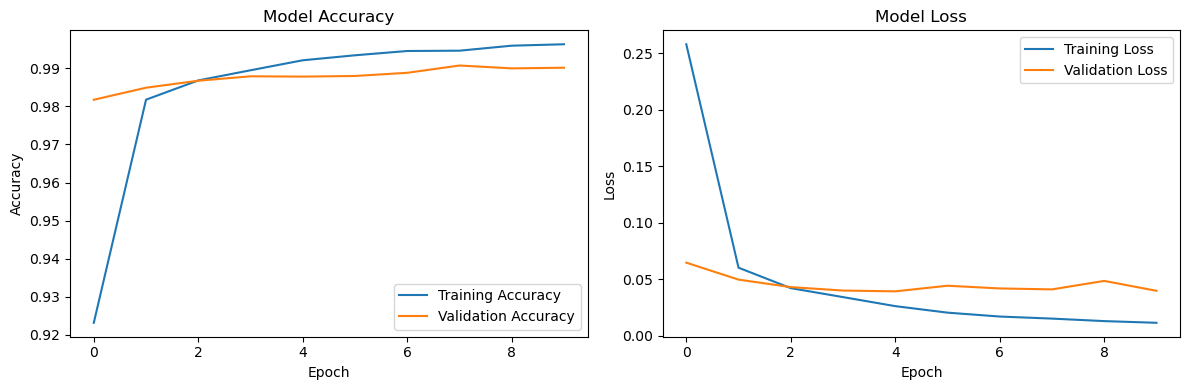

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可复现
tf.random.set_seed(42)
np.random.seed(42)

# 1. 加载并预处理数据
def load_and_preprocess_data():
    # 加载MNIST数据集
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    # 数据预处理
    # 归一化到0-1之间
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    # 添加通道维度
    X_train = X_train.reshape((-1, 28, 28, 1))
    X_test = X_test.reshape((-1, 28, 28, 1))
    
    # One-hot编码标签
    y_train = tf.keras.utils.to_categorical(y_train)
    y_test = tf.keras.utils.to_categorical(y_test)
    
    return X_train, y_train, X_test, y_test

# 2. 构建CNN模型
def build_cnn_model():
    model = Sequential([
        # 第一个卷积块
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        
        # 第二个卷积块
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        
        # 第三个卷积块
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        
        # 展平层
        Flatten(),
        
        # 全连接层
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    # 编译模型
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

# 3. 训练和评估函数
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # 训练模型
    history = model.fit(X_train, y_train,
                       batch_size=128,
                       epochs=10,
                       validation_split=0.2,
                       verbose=1)
    
    # 评估模型
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'\nTest accuracy: {test_accuracy:.4f}')
    
    return history

# 4. 绘制训练历史
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 绘制准确率
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # 绘制损失
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# 5. 预测示例函数
def predict_examples(model, X_test, y_test):
    # 预测几个测试样例
    predictions = model.predict(X_test[:5])
    
    # 显示图像和预测结果
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        ax.set_title(f'Pred: {predicted_label}\nTrue: {true_label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 主程序
def main():
    # 加载和预处理数据
    print("Loading and preprocessing data...")
    X_train, y_train, X_test, y_test = load_and_preprocess_data()
    
    # 构建模型
    print("\nBuilding CNN model...")
    model = build_cnn_model()
    model.summary()
    
    # 训练和评估模型
    print("\nTraining model...")
    history = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    
    # 绘制训练历史
    plot_training_history(history)
    
    # 预测示例
    # predict_examples(model, X_test, y_test)

main()